In [1]:
import pandas as pd

In [6]:
df = pd.read_excel("../data/raw/VisaOroBCPQore.xlsx")

In [7]:
df["Fecha"] = pd.to_datetime(df["Fecha"])
df["Descripcion"] = (
    df["Descripcion"]
    .str.strip()
    .str.upper()
    .str.replace(r"\s+", " ", regex=True)
)
df["tipo_movimiento"] = df["Monto"].apply(lambda x: "GASTO" if x < 0 else "PAGO")
df["monto_abs"] = df["Monto"].abs()

gastos = df[df["tipo_movimiento"] == "GASTO"]

In [8]:
gastos.sample(5)

,Fecha,Descripcion,Moneda,Monto,tipo_movimiento,monto_abs
19,2025-11-05,DUFF BREWERY K01302389 ORLANDO FL,$,-5.86,GASTO,5.86
6,2025-12-09,TELE000995431040,S/,-39.90,GASTO,39.90
21,2025-11-01,MEARS CONNECT ORLANDO FL,$,-35.20,GASTO,35.20
50,2025-08-11,TELE000871387721,S/,-100.01,GASTO,100.01
3,2025-12-19,UNIV000072355492,S/,-756.00,GASTO,756.00


In [9]:
resumen = (
    gastos
    .groupby("Descripcion", as_index=False)["Monto"]
    .sum()
    .sort_values("Monto")
)
resumen.sample(5)

,Descripcion,Monto
19,OCORIS 2 LIMA PE,-50.0
24,RESTAURANTE MOCHE LIMA PE,-442.0
5,E S SHENANDOA SANTIAGO DE S,-50.0
31,TAMBO MENDIOLA-C5 LIMA PE,-18.3
23,RECIBO CAC LARCO LIMA PE,-1230.0


In [14]:
resumen["Monto"] = resumen["Monto"].abs()

In [15]:
resumen.sample()

,Descripcion,Monto
20,OXXO ALTAMIRA LIMA PE,6.9


In [17]:
df["Descripcion_base"] = (
    df["Descripcion"]
    .str.upper()
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)
df.sample()

,Fecha,Descripcion,Moneda,Monto,tipo_movimiento,monto_abs,Descripcion_base
25,2025-10-24,T6150 JOCKEY PLAZA PAT LIMA PE,S/,-35.8,GASTO,35.8,T6150 JOCKEY PLAZA PAT LIMA PE


In [20]:
df["Pais"] = df["Descripcion_base"].str.extract(r"\b([A-Z]{2})$")
df["Descripcion_sin_geo"] = (
    df["Descripcion_base"]
    .str.replace(r"\bLIMA\b", "", regex=True)
    .str.replace(r"\bORLANDO\b", "", regex=True)
    .str.replace(r"\bPE\b|\bFL\b", "", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)
df.sample()


,Fecha,Descripcion,Moneda,Monto,tipo_movimiento,monto_abs,Descripcion_base,Pais,Descripcion_sin_geo
20,2025-11-02,WDW GERMANYBIERLINE LAKE BUENA VI FL,$,-18.64,GASTO,18.64,WDW GERMANYBIERLINE LAKE BUENA VI FL,FL,WDW GERMANYBIERLINE LAKE BUENA VI


In [25]:
df["Descripcion_limpia"] = (
    df["Descripcion_sin_geo"]
    .str.replace(r"^(VM\*|IZI\*)", "", regex=True)
    .str.replace(r"(TELE|CLAR)\d+", r"\1", regex=True)
    .str.replace(r"\d+", "", regex=True)
    .str.strip()
)
df.sample(5)

,Fecha,Descripcion,Moneda,Monto,tipo_movimiento,monto_abs,Descripcion_base,Pais,Descripcion_sin_geo,Descripcion_limpia
10,2025-12-03,APPARKA APS FULL JOCKE LIMA PE,S/,-4.90,GASTO,4.90,APPARKA APS FULL JOCKE LIMA PE,PE,APPARKA APS FULL JOCKE,APPARKA APS FULL JOCKE
12,2025-12-03,SB - 002 JOCKEY PLAZA LIMA PE,S/,-60.00,GASTO,60.00,SB - 002 JOCKEY PLAZA LIMA PE,PE,SB - 002 JOCKEY PLAZA,SB - JOCKEY PLAZA
7,2025-12-05,PAGO BANCA MOVIL,S/,31.66,PAGO,31.66,PAGO BANCA MOVIL,NaN,PAGO BANCA MOVIL,PAGO BANCA MOVIL
45,2025-08-23,OXXO ALTAMIRA LIMA PE,S/,-6.90,GASTO,6.90,OXXO ALTAMIRA LIMA PE,PE,OXXO ALTAMIRA,OXXO ALTAMIRA
43,2025-08-24,FALABELLA ANGAMOS LIMA PE,S/,-1299.00,GASTO,1299.00,FALABELLA ANGAMOS LIMA PE,PE,FALABELLA ANGAMOS,FALABELLA ANGAMOS


In [26]:
patrones_base = {
    r"FALABELLA": "FALABELLA",
    r"PLAZA VEA": "PLAZA VEA",
    r"KFC": "KFC",
    r"OXXO": "OXXO",
    r"LUANA MARKET|MARKET": "MARKET",
    r"NORKYS": "NORKYS",
}


In [32]:
dfcopia= df.copy()
dfcopia.groupby('Descripcion_limpia')['Monto'].sum().sort_values(ascending=False)
dfcopia = dfcopia[dfcopia["tipo_movimiento"] == "GASTO"]
dfcopia

,Fecha,Descripcion,Moneda,Monto,tipo_movimiento,monto_abs,Descripcion_base,Pais,Descripcion_sin_geo,Descripcion_limpia
0,2025-12-27,E S SHENANDOA SANTIAGO DE S,S/,-50.00,GASTO,50.00,E S SHENANDOA SANTIAGO DE S,NaN,E S SHENANDOA SANTIAGO DE S,E S SHENANDOA SANTIAGO DE S
1,2025-12-19,VM*LUISA LIMA PE,S/,-79.80,GASTO,79.80,VM*LUISA LIMA PE,PE,VM*LUISA,LUISA
2,2025-12-19,OXXO NORTE LIMA PE,S/,-14.20,GASTO,14.20,OXXO NORTE LIMA PE,PE,OXXO NORTE,OXXO NORTE
3,2025-12-19,UNIV000072355492,S/,-756.00,GASTO,756.00,UNIV000072355492,NaN,UNIV000072355492,UNIV
4,2025-12-18,LUANA MARKET LIMA PE,S/,-2.20,GASTO,2.20,LUANA MARKET LIMA PE,PE,LUANA MARKET,LUANA MARKET
5,2025-12-09,FARMACIA UNIVERSAL LIMA PE,S/,-188.54,GASTO,188.54,FARMACIA UNIVERSAL LIMA PE,PE,FARMACIA UNIVERSAL,FARMACIA UNIVERSAL
6,2025-12-09,TELE000995431040,S/,-39.90,GASTO,39.90,TELE000995431040,NaN,TELE000995431040,TELE
9,2025-12-04,KFC 114 RP SALAVERRY K LIMA PE,S/,-77.90,GASTO,77.90,KFC 114 RP SALAVERRY K LIMA PE,PE,KFC 114 RP SALAVERRY K,KFC RP SALAVERRY K
10,2025-12-03,APPARKA APS FULL JOCKE LIMA PE,S/,-4.90,GASTO,4.90,APPARKA APS FULL JOCKE LIMA PE,PE,APPARKA APS FULL JOCKE,APPARKA APS FULL JOCKE
11,2025-12-03,APPARKA APS FULL JOCKE LIMA PE,S/,-7.90,GASTO,7.90,APPARKA APS FULL JOCKE LIMA PE,PE,APPARKA APS FULL JOCKE,APPARKA APS FULL JOCKE


In [49]:
import numpy as np
import re



In [50]:
patrones = pd.read_csv("../data/references/catergorias2.csv")

# aseguramos orden correcto
patrones = patrones.sort_values("prioridad")

In [51]:
def clasificar_descripcion(desc):
    if pd.isna(desc):
        return "Otros", "Otros"
    
    desc = desc.upper()
    
    for _, row in patrones.iterrows():
        patron = row["patron"]
        
        if re.search(patron, desc, re.IGNORECASE):
            return row["categoria"], row["supercategoria"]
    
    return "Otros", "Otros"


In [52]:
dfcopia[["Categoria", "Supercategoria"]] = dfcopia["Descripcion_limpia"] \
    .apply(lambda x: pd.Series(clasificar_descripcion(x)))


In [53]:
dfcopia[["Descripcion_limpia", "Categoria", "Supercategoria"]].head(15)


,Descripcion_limpia,Categoria,Supercategoria
0,E S SHENANDOA SANTIAGO DE S,Food,Comidas
1,LUISA,Otros,Otros
2,OXXO NORTE,Oxxo,Supermercados
3,UNIV,EDUCACION,60
4,LUANA MARKET,SUPERMERCADOS,5
5,FARMACIA UNIVERSAL,Salud,Salud
6,TELE,Teléfono,Teléfono
9,KFC RP SALAVERRY K,KFC,Comidas
10,APPARKA APS FULL JOCKE,AparkA,Estacionamiento
11,APPARKA APS FULL JOCKE,AparkA,Estacionamiento


In [54]:
dfcopia[dfcopia["Categoria"] == "Otros"]["Descripcion_limpia"].value_counts()


Descripcion_limpia
LUISA                                1
ROB OASIS                            1
DUFF BREWERY K                       1
WDW GERMANYBIERLINE LAKE BUENA VI    1
MEARS CONNECT                        1
OCORIS                               1
ESTELAR MIRAFLORES                   1
RECIBO CAC LARCO                     1
Name: count, dtype: int64

In [55]:
dfcopia["Pais"] = dfcopia["Pais"].fillna("PE")


In [59]:
df.sample(5)


,Fecha,Descripcion,Moneda,Monto,tipo_movimiento,monto_abs,Descripcion_base,Pais,Descripcion_sin_geo,Descripcion_limpia
20,2025-11-02,WDW GERMANYBIERLINE LAKE BUENA VI FL,$,-18.64,GASTO,18.64,WDW GERMANYBIERLINE LAKE BUENA VI FL,FL,WDW GERMANYBIERLINE LAKE BUENA VI,WDW GERMANYBIERLINE LAKE BUENA VI
38,2025-09-13,LISTO CAYETANO LA MOLI LIMA PE,S/,-12.90,GASTO,12.90,LISTO CAYETANO LA MOLI LIMA PE,PE,LISTO CAYETANO LA MOLI,LISTO CAYETANO LA MOLI
29,2025-10-10,T6169 PLAZA VEA JOCKEY LIMA PE,S/,-29.90,GASTO,29.90,T6169 PLAZA VEA JOCKEY LIMA PE,PE,T6169 PLAZA VEA JOCKEY,T PLAZA VEA JOCKEY
28,2025-10-10,APPARKA APS FULL JOCKE LIMA PE,S/,-4.90,GASTO,4.90,APPARKA APS FULL JOCKE LIMA PE,PE,APPARKA APS FULL JOCKE,APPARKA APS FULL JOCKE
14,2025-11-22,T6150 JOCKEY PLAZA PAT LIMA PE,S/,-20.90,GASTO,20.90,T6150 JOCKEY PLAZA PAT LIMA PE,PE,T6150 JOCKEY PLAZA PAT,T JOCKEY PLAZA PAT


In [60]:
df_gastos = (
    dfcopia[dfcopia["tipo_movimiento"] == "GASTO"]
    .groupby("Categoria", as_index=False)["monto_abs"]
    .sum()
    .sort_values("monto_abs", ascending=False)
)


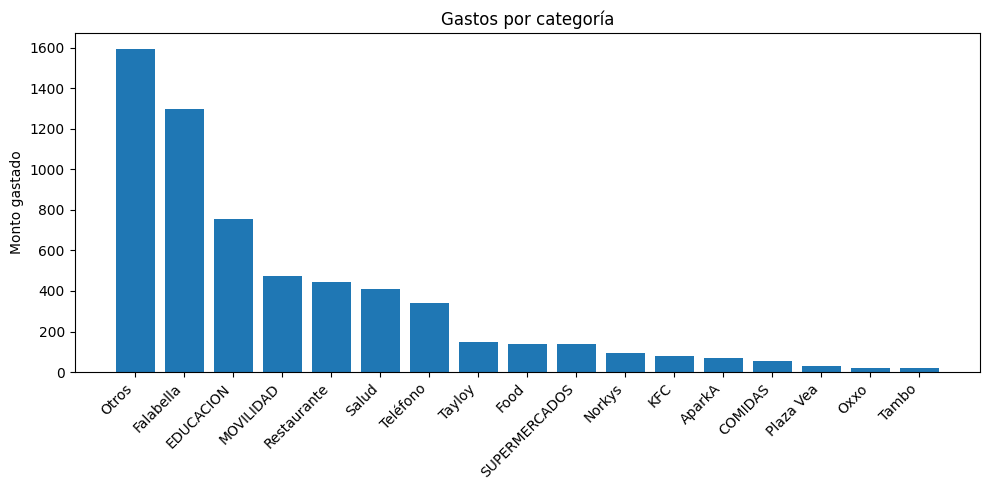

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_gastos["Categoria"], df_gastos["monto_abs"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Monto gastado")
plt.title("Gastos por categoría")
plt.tight_layout()
plt.show()
